# Modification of dataset structure in order to use FADN codes for sheet "FICHA_I

In [1]:
import pandas as pd
import numpy as np
import os
import random
import matplotlib.pyplot as plt

In [2]:
# Path and file name
path = r"C:\Users\IDENER-Matlab1\Desktop\AGRICORE\SharePoint\OneDrive_2021-02-16\Microdatos para OTE370"
file_name = "book.xlsx"

# Reading microdata sheet "Ficha_I"
table_I = pd.read_excel(os.path.join(path, file_name), sheet_name="Ficha_I")

In [3]:
table_I.head(10)

Ejercicio  Explotacion  Categoria  Tc  Md  Superf. Tot.  Superf. Reg.  \
0       2014        55284      40130   1   0           549           109   
1       2014        55284      40320   1   0          1444           444   
2       2014        55284      50200   0   0           549             0   
3       2015        55284      50900   0   0            39             0   
4       2015        55284      90900   0   4             0             0   
5       2015        55284      50200   0   0           549             0   
6       2014        55284      50210   0   0           549             0   
7       2015        55284      40130   1   0           549           109   
8       2014        55284      50900   0   0            39             0   
9       2014        55284      90900   0   4             0             0   

   Superf. Energ.  Superf. Omg.  Invent. Inic.  Invent. Fin  Produc. Cant.  \
0               0             0              0            0             15   
1               0             0              0            0            200   
2               0             0              0            0              0   
3               0             0              0            0              0   
4               0             0              0            0              0   
5               0             0              0            0              0   
6               0             0              0            0              0   
7               0             0              0            0             26   
8               0             0              0            0              0   
9               0             0              0            0              0   

   Ventas Cant.  Ventas Euros  Autoconsumo  Reempleo  
0            15          1963            0         0  
1           200          9774            0         0  
2             0             0            0         0  
3             0             0            0         0  
4             0          1004            0         0  
5             0             0            0         0  
6             0             0            0         0  
7            26          3343            0         0  
8             0             0            0         0  
9             0          1166            0         0

Converssion with *Farmer_model.pdf/Table 16: I. CROPS*  

In [4]:
def _sortingDF(DF, columns):
    """
    Ordering dataframe by columns values
    """
    
    sortedDF = pd.DataFrame(columns=DF.columns)
    
    # Building dictionary to store n unique values for each column
    dict_ = {}
    
    for col in columns:
        dict_[col] = sorted(DF[col].unique())
    
    # Building lists containing nunique values for each list
    # Loop exploitations
    for expl in dict_["Explotacion"]:
        
        # Loop years
        for y in dict_["Ejercicio"]:
            
            # Loop Categories
            for cat in dict_["Categoria"]:
                
                dataset = DF[(DF["Explotacion"]==expl) & (DF["Ejercicio"]==y) & (DF["Categoria"]==cat)]
                    
                if not dataset.empty:
                    sortedDF = pd.concat([sortedDF, dataset])
    
    # Index modification
    sortedDF.index = np.arange(sortedDF.shape[0])
    
    return sortedDF

In [5]:
table_I_sorted = _sortingDF(table_I, ["Ejercicio", "Explotacion", "Categoria"])

In [6]:
table_I_sorted.head(10)

Ejercicio Explotacion Categoria Tc Md Superf. Tot. Superf. Reg.  \
0      2014       55284     40130  1  0          549          109   
1      2014       55284     40320  1  0         1444          444   
2      2014       55284     50200  0  0          549            0   
3      2014       55284     50210  0  0          549            0   
4      2014       55284     50900  0  0           39            0   
5      2014       55284     90900  0  4            0            0   
6      2015       55284     40130  1  0          549          109   
7      2015       55284     40320  1  0         1444          444   
8      2015       55284     50200  0  0          549            0   
9      2015       55284     50210  0  0          549            0   

  Superf. Energ. Superf. Omg. Invent. Inic. Invent. Fin Produc. Cant.  \
0              0            0             0           0            15   
1              0            0             0           0           200   
2              0            0             0           0             0   
3              0            0             0           0             0   
4              0            0             0           0             0   
5              0            0             0           0             0   
6              0            0             0           0            26   
7              0            0             0           0           180   
8              0            0             0           0             0   
9              0            0             0           0             0   

  Ventas Cant. Ventas Euros Autoconsumo Reempleo  
0           15         1963           0        0  
1          200         9774           0        0  
2            0            0           0        0  
3            0            0           0        0  
4            0            0           0        0  
5            0         1166           0        0  
6           26         3343           0        0  
7          180         8655           0        0  
8            0            0           0        0  
9            0            0           0        0

In [15]:
table_I_sorted.to_csv("table_I_sorted.csv", index=False)

## FADN tables relationships

In [ ]:
crop_codes = [10110, 10120]

In [27]:
for i in range(109, 110):
    char = ""
    for j in range(1, 6):
        char += "{}, ".format(100*i+10*j)

    print(char)

10810, 10820, 10830, 10840, 10850, 


In [151]:
codes = [[
10110, 10120, 10130, 10140, 10150, 10160, 10170, 10190, 
10210, 10220, 10290, 
10300, 10310, 10390, 
10400, 
10500], 
[
10601, 10602, 10603, 10604, 10605, 10606, 10607, 10608, 10609, 10610, 10611, 10612, 10613, 10690,
10711], 
 
[10712, 10720, 10731, 10732, 10733, 10734, 10735, 10736, 10737, 10738, 10739, 10790,
10810], 
 
[10820, 10830, 10840, 10850, 
10910, 10921, 10922, 10923, 
11000, 11100, 11210, 11220, 11300],
 
[20000, 
30100, 30200, 30300, 
40111, 40112, 40113, 40114, 40115, 40120, 40130,
40210, 40220, 40230, 40290],

[40310, 40320, 40330, 40340, 
40411, 40412, 40420, 40430, 40440, 40451, 40452, 40460, 40470],
 
[40480, 
40500,
40600, 40610,
40700, 
40800,
50100, 50200, 50210, 50900,
60000,
90100, 90200, 90300, 90310], 
 
[90320, 90330, 
90900]
]


#"Tc": ,
#"Md": ,

link = {
    "Superf. Tot.": ["A", "TA"],
    "Superf. Reg.": ["A", "IR"],
    "Superf. Energ.": ["A", "EN"],
    "Superf. Omg.": ["A", "GM"],
    "Invent. Inic.": ["OV", "V"],
    "Invent. Fin": ["CV", "V"],
    "Produc. Cant.": ["PR", "Q"],
    "Ventas Cant.": ["SA", "Q"],
    "Ventas Euros": ["SA", "V"],
    "Autoconsumo": ["FC", "V"],
    "Reempleo": ["FU", "V"],}

In [40]:
old_columns = ['Superf. Tot.', 'Superf. Reg.', 'Superf. Energ.', 'Superf. Omg.', 'Invent. Inic.', 'Invent. Fin', 'Produc. Cant.', 'Ventas Cant.', 'Ventas Euros', 'Autoconsumo', 'Reempleo']

### First colum converssion to  FADN

In [48]:
table_by_sheet = {}

# Loop FADN sheet tables
for sheet in codes:
    print(1+codes.index(sheet))
    
    # Acumulated per sheet
    acum = ""
    
    # Loop codes per sheet
    for code in sheet:
        
        line = ""
        
        # Loop columns
        for oc in old_columns:
            
            # Link keys extraction
            # Header 1
            h1 = link[oc][0]
            
            # Header 2
            h2 = link[oc][1]
            
            # Position 1
            p1 = "TC"
            
            # Position 2
            p2 = "MD"
            
            # New column name
            nc_name = "'I_{}_{}_{}_{}_{}'".format(h1, code, p1, p2, h2)
            
            line += "{}, ".format(nc_name)
        
        print(line)
        
        # Line addition
        acum += "{}\n".format(line)
        
    table_by_sheet[1+codes.index(sheet)] = acum
    print("\n")

1
'I_A_10110_TC_MD_TA', 'I_A_10110_TC_MD_IR', 'I_A_10110_TC_MD_EN', 'I_A_10110_TC_MD_GM', 'I_OV_10110_TC_MD_V', 'I_CV_10110_TC_MD_V', 'I_PR_10110_TC_MD_Q', 'I_SA_10110_TC_MD_Q', 'I_SA_10110_TC_MD_V', 'I_FC_10110_TC_MD_V', 'I_FU_10110_TC_MD_V', 
'I_A_10120_TC_MD_TA', 'I_A_10120_TC_MD_IR', 'I_A_10120_TC_MD_EN', 'I_A_10120_TC_MD_GM', 'I_OV_10120_TC_MD_V', 'I_CV_10120_TC_MD_V', 'I_PR_10120_TC_MD_Q', 'I_SA_10120_TC_MD_Q', 'I_SA_10120_TC_MD_V', 'I_FC_10120_TC_MD_V', 'I_FU_10120_TC_MD_V', 
'I_A_10130_TC_MD_TA', 'I_A_10130_TC_MD_IR', 'I_A_10130_TC_MD_EN', 'I_A_10130_TC_MD_GM', 'I_OV_10130_TC_MD_V', 'I_CV_10130_TC_MD_V', 'I_PR_10130_TC_MD_Q', 'I_SA_10130_TC_MD_Q', 'I_SA_10130_TC_MD_V', 'I_FC_10130_TC_MD_V', 'I_FU_10130_TC_MD_V', 
'I_A_10140_TC_MD_TA', 'I_A_10140_TC_MD_IR', 'I_A_10140_TC_MD_EN', 'I_A_10140_TC_MD_GM', 'I_OV_10140_TC_MD_V', 'I_CV_10140_TC_MD_V', 'I_PR_10140_TC_MD_Q', 'I_SA_10140_TC_MD_Q', 'I_SA_10140_TC_MD_V', 'I_FC_10140_TC_MD_V', 'I_FU_10140_TC_MD_V', 
'I_A_10150_TC_MD_TA', 'I_A

In [120]:
new_column_names = [
    'I_A_10110_TC_MD_TA', 'I_A_10110_TC_MD_IR', 'I_A_10110_TC_MD_EN', 'I_A_10110_TC_MD_GM', 'I_OV_10110_TC_MD_V', 'I_CV_10110_TC_MD_V', 'I_PR_10110_TC_MD_Q', 'I_SA_10110_TC_MD_Q', 'I_SA_10110_TC_MD_V', 'I_FC_10110_TC_MD_V', 'I_FU_10110_TC_MD_V', 
    'I_A_10120_TC_MD_TA', 'I_A_10120_TC_MD_IR', 'I_A_10120_TC_MD_EN', 'I_A_10120_TC_MD_GM', 'I_OV_10120_TC_MD_V', 'I_CV_10120_TC_MD_V', 'I_PR_10120_TC_MD_Q', 'I_SA_10120_TC_MD_Q', 'I_SA_10120_TC_MD_V', 'I_FC_10120_TC_MD_V', 'I_FU_10120_TC_MD_V', 
    'I_A_10130_TC_MD_TA', 'I_A_10130_TC_MD_IR', 'I_A_10130_TC_MD_EN', 'I_A_10130_TC_MD_GM', 'I_OV_10130_TC_MD_V', 'I_CV_10130_TC_MD_V', 'I_PR_10130_TC_MD_Q', 'I_SA_10130_TC_MD_Q', 'I_SA_10130_TC_MD_V', 'I_FC_10130_TC_MD_V', 'I_FU_10130_TC_MD_V', 
    'I_A_10140_TC_MD_TA', 'I_A_10140_TC_MD_IR', 'I_A_10140_TC_MD_EN', 'I_A_10140_TC_MD_GM', 'I_OV_10140_TC_MD_V', 'I_CV_10140_TC_MD_V', 'I_PR_10140_TC_MD_Q', 'I_SA_10140_TC_MD_Q', 'I_SA_10140_TC_MD_V', 'I_FC_10140_TC_MD_V', 'I_FU_10140_TC_MD_V', 
    'I_A_10150_TC_MD_TA', 'I_A_10150_TC_MD_IR', 'I_A_10150_TC_MD_EN', 'I_A_10150_TC_MD_GM', 'I_OV_10150_TC_MD_V', 'I_CV_10150_TC_MD_V', 'I_PR_10150_TC_MD_Q', 'I_SA_10150_TC_MD_Q', 'I_SA_10150_TC_MD_V', 'I_FC_10150_TC_MD_V', 'I_FU_10150_TC_MD_V', 
    'I_A_10160_TC_MD_TA', 'I_A_10160_TC_MD_IR', 'I_A_10160_TC_MD_EN', 'I_A_10160_TC_MD_GM', 'I_OV_10160_TC_MD_V', 'I_CV_10160_TC_MD_V', 'I_PR_10160_TC_MD_Q', 'I_SA_10160_TC_MD_Q', 'I_SA_10160_TC_MD_V', 'I_FC_10160_TC_MD_V', 'I_FU_10160_TC_MD_V', 
    'I_A_10170_TC_MD_TA', 'I_A_10170_TC_MD_IR', 'I_A_10170_TC_MD_EN', 'I_A_10170_TC_MD_GM', 'I_OV_10170_TC_MD_V', 'I_CV_10170_TC_MD_V', 'I_PR_10170_TC_MD_Q', 'I_SA_10170_TC_MD_Q', 'I_SA_10170_TC_MD_V', 'I_FC_10170_TC_MD_V', 'I_FU_10170_TC_MD_V', 
    'I_A_10190_TC_MD_TA', 'I_A_10190_TC_MD_IR', 'I_A_10190_TC_MD_EN', 'I_A_10190_TC_MD_GM', 'I_OV_10190_TC_MD_V', 'I_CV_10190_TC_MD_V', 'I_PR_10190_TC_MD_Q', 'I_SA_10190_TC_MD_Q', 'I_SA_10190_TC_MD_V', 'I_FC_10190_TC_MD_V', 'I_FU_10190_TC_MD_V', 
    'I_A_10210_TC_MD_TA', 'I_A_10210_TC_MD_IR', 'I_A_10210_TC_MD_EN', 'I_A_10210_TC_MD_GM', 'I_OV_10210_TC_MD_V', 'I_CV_10210_TC_MD_V', 'I_PR_10210_TC_MD_Q', 'I_SA_10210_TC_MD_Q', 'I_SA_10210_TC_MD_V', 'I_FC_10210_TC_MD_V', 'I_FU_10210_TC_MD_V', 
    'I_A_10220_TC_MD_TA', 'I_A_10220_TC_MD_IR', 'I_A_10220_TC_MD_EN', 'I_A_10220_TC_MD_GM', 'I_OV_10220_TC_MD_V', 'I_CV_10220_TC_MD_V', 'I_PR_10220_TC_MD_Q', 'I_SA_10220_TC_MD_Q', 'I_SA_10220_TC_MD_V', 'I_FC_10220_TC_MD_V', 'I_FU_10220_TC_MD_V', 
    'I_A_10290_TC_MD_TA', 'I_A_10290_TC_MD_IR', 'I_A_10290_TC_MD_EN', 'I_A_10290_TC_MD_GM', 'I_OV_10290_TC_MD_V', 'I_CV_10290_TC_MD_V', 'I_PR_10290_TC_MD_Q', 'I_SA_10290_TC_MD_Q', 'I_SA_10290_TC_MD_V', 'I_FC_10290_TC_MD_V', 'I_FU_10290_TC_MD_V', 
    'I_A_10300_TC_MD_TA', 'I_A_10300_TC_MD_IR', 'I_A_10300_TC_MD_EN', 'I_A_10300_TC_MD_GM', 'I_OV_10300_TC_MD_V', 'I_CV_10300_TC_MD_V', 'I_PR_10300_TC_MD_Q', 'I_SA_10300_TC_MD_Q', 'I_SA_10300_TC_MD_V', 'I_FC_10300_TC_MD_V', 'I_FU_10300_TC_MD_V', 
    'I_A_10310_TC_MD_TA', 'I_A_10310_TC_MD_IR', 'I_A_10310_TC_MD_EN', 'I_A_10310_TC_MD_GM', 'I_OV_10310_TC_MD_V', 'I_CV_10310_TC_MD_V', 'I_PR_10310_TC_MD_Q', 'I_SA_10310_TC_MD_Q', 'I_SA_10310_TC_MD_V', 'I_FC_10310_TC_MD_V', 'I_FU_10310_TC_MD_V', 
    'I_A_10390_TC_MD_TA', 'I_A_10390_TC_MD_IR', 'I_A_10390_TC_MD_EN', 'I_A_10390_TC_MD_GM', 'I_OV_10390_TC_MD_V', 'I_CV_10390_TC_MD_V', 'I_PR_10390_TC_MD_Q', 'I_SA_10390_TC_MD_Q', 'I_SA_10390_TC_MD_V', 'I_FC_10390_TC_MD_V', 'I_FU_10390_TC_MD_V', 
    'I_A_10400_TC_MD_TA', 'I_A_10400_TC_MD_IR', 'I_A_10400_TC_MD_EN', 'I_A_10400_TC_MD_GM', 'I_OV_10400_TC_MD_V', 'I_CV_10400_TC_MD_V', 'I_PR_10400_TC_MD_Q', 'I_SA_10400_TC_MD_Q', 'I_SA_10400_TC_MD_V', 'I_FC_10400_TC_MD_V', 'I_FU_10400_TC_MD_V', 
    'I_A_10500_TC_MD_TA', 'I_A_10500_TC_MD_IR', 'I_A_10500_TC_MD_EN', 'I_A_10500_TC_MD_GM', 'I_OV_10500_TC_MD_V', 'I_CV_10500_TC_MD_V', 'I_PR_10500_TC_MD_Q', 'I_SA_10500_TC_MD_Q', 'I_SA_10500_TC_MD_V', 'I_FC_10500_TC_MD_V', 'I_FU_10500_TC_MD_V',
    
    'I_A_10601_TC_MD_TA', 'I_A_10601_TC_MD_IR', 'I_A_10601_TC_MD_EN', 'I_A_10601_TC_MD_GM', 'I_OV_10601_TC_MD_V', 'I_CV_10601_TC_MD_V', 'I_PR_10601_TC_MD_Q', 'I_SA_10601_TC_MD_Q', 'I_SA_10601_TC_MD_V', 'I_FC_10601_TC_MD_V', 'I_FU_10601_TC_MD_V', 
    'I_A_10602_TC_MD_TA', 'I_A_10602_TC_MD_IR', 'I_A_10602_TC_MD_EN', 'I_A_10602_TC_MD_GM', 'I_OV_10602_TC_MD_V', 'I_CV_10602_TC_MD_V', 'I_PR_10602_TC_MD_Q', 'I_SA_10602_TC_MD_Q', 'I_SA_10602_TC_MD_V', 'I_FC_10602_TC_MD_V', 'I_FU_10602_TC_MD_V', 
    'I_A_10603_TC_MD_TA', 'I_A_10603_TC_MD_IR', 'I_A_10603_TC_MD_EN', 'I_A_10603_TC_MD_GM', 'I_OV_10603_TC_MD_V', 'I_CV_10603_TC_MD_V', 'I_PR_10603_TC_MD_Q', 'I_SA_10603_TC_MD_Q', 'I_SA_10603_TC_MD_V', 'I_FC_10603_TC_MD_V', 'I_FU_10603_TC_MD_V', 
    'I_A_10604_TC_MD_TA', 'I_A_10604_TC_MD_IR', 'I_A_10604_TC_MD_EN', 'I_A_10604_TC_MD_GM', 'I_OV_10604_TC_MD_V', 'I_CV_10604_TC_MD_V', 'I_PR_10604_TC_MD_Q', 'I_SA_10604_TC_MD_Q', 'I_SA_10604_TC_MD_V', 'I_FC_10604_TC_MD_V', 'I_FU_10604_TC_MD_V', 
    'I_A_10605_TC_MD_TA', 'I_A_10605_TC_MD_IR', 'I_A_10605_TC_MD_EN', 'I_A_10605_TC_MD_GM', 'I_OV_10605_TC_MD_V', 'I_CV_10605_TC_MD_V', 'I_PR_10605_TC_MD_Q', 'I_SA_10605_TC_MD_Q', 'I_SA_10605_TC_MD_V', 'I_FC_10605_TC_MD_V', 'I_FU_10605_TC_MD_V', 
    'I_A_10606_TC_MD_TA', 'I_A_10606_TC_MD_IR', 'I_A_10606_TC_MD_EN', 'I_A_10606_TC_MD_GM', 'I_OV_10606_TC_MD_V', 'I_CV_10606_TC_MD_V', 'I_PR_10606_TC_MD_Q', 'I_SA_10606_TC_MD_Q', 'I_SA_10606_TC_MD_V', 'I_FC_10606_TC_MD_V', 'I_FU_10606_TC_MD_V', 
    'I_A_10607_TC_MD_TA', 'I_A_10607_TC_MD_IR', 'I_A_10607_TC_MD_EN', 'I_A_10607_TC_MD_GM', 'I_OV_10607_TC_MD_V', 'I_CV_10607_TC_MD_V', 'I_PR_10607_TC_MD_Q', 'I_SA_10607_TC_MD_Q', 'I_SA_10607_TC_MD_V', 'I_FC_10607_TC_MD_V', 'I_FU_10607_TC_MD_V', 
    'I_A_10608_TC_MD_TA', 'I_A_10608_TC_MD_IR', 'I_A_10608_TC_MD_EN', 'I_A_10608_TC_MD_GM', 'I_OV_10608_TC_MD_V', 'I_CV_10608_TC_MD_V', 'I_PR_10608_TC_MD_Q', 'I_SA_10608_TC_MD_Q', 'I_SA_10608_TC_MD_V', 'I_FC_10608_TC_MD_V', 'I_FU_10608_TC_MD_V', 
    'I_A_10609_TC_MD_TA', 'I_A_10609_TC_MD_IR', 'I_A_10609_TC_MD_EN', 'I_A_10609_TC_MD_GM', 'I_OV_10609_TC_MD_V', 'I_CV_10609_TC_MD_V', 'I_PR_10609_TC_MD_Q', 'I_SA_10609_TC_MD_Q', 'I_SA_10609_TC_MD_V', 'I_FC_10609_TC_MD_V', 'I_FU_10609_TC_MD_V', 
    'I_A_10610_TC_MD_TA', 'I_A_10610_TC_MD_IR', 'I_A_10610_TC_MD_EN', 'I_A_10610_TC_MD_GM', 'I_OV_10610_TC_MD_V', 'I_CV_10610_TC_MD_V', 'I_PR_10610_TC_MD_Q', 'I_SA_10610_TC_MD_Q', 'I_SA_10610_TC_MD_V', 'I_FC_10610_TC_MD_V', 'I_FU_10610_TC_MD_V', 
    'I_A_10611_TC_MD_TA', 'I_A_10611_TC_MD_IR', 'I_A_10611_TC_MD_EN', 'I_A_10611_TC_MD_GM', 'I_OV_10611_TC_MD_V', 'I_CV_10611_TC_MD_V', 'I_PR_10611_TC_MD_Q', 'I_SA_10611_TC_MD_Q', 'I_SA_10611_TC_MD_V', 'I_FC_10611_TC_MD_V', 'I_FU_10611_TC_MD_V', 
    'I_A_10612_TC_MD_TA', 'I_A_10612_TC_MD_IR', 'I_A_10612_TC_MD_EN', 'I_A_10612_TC_MD_GM', 'I_OV_10612_TC_MD_V', 'I_CV_10612_TC_MD_V', 'I_PR_10612_TC_MD_Q', 'I_SA_10612_TC_MD_Q', 'I_SA_10612_TC_MD_V', 'I_FC_10612_TC_MD_V', 'I_FU_10612_TC_MD_V', 
    'I_A_10613_TC_MD_TA', 'I_A_10613_TC_MD_IR', 'I_A_10613_TC_MD_EN', 'I_A_10613_TC_MD_GM', 'I_OV_10613_TC_MD_V', 'I_CV_10613_TC_MD_V', 'I_PR_10613_TC_MD_Q', 'I_SA_10613_TC_MD_Q', 'I_SA_10613_TC_MD_V', 'I_FC_10613_TC_MD_V', 'I_FU_10613_TC_MD_V', 
    'I_A_10690_TC_MD_TA', 'I_A_10690_TC_MD_IR', 'I_A_10690_TC_MD_EN', 'I_A_10690_TC_MD_GM', 'I_OV_10690_TC_MD_V', 'I_CV_10690_TC_MD_V', 'I_PR_10690_TC_MD_Q', 'I_SA_10690_TC_MD_Q', 'I_SA_10690_TC_MD_V', 'I_FC_10690_TC_MD_V', 'I_FU_10690_TC_MD_V', 
    'I_A_10711_TC_MD_TA', 'I_A_10711_TC_MD_IR', 'I_A_10711_TC_MD_EN', 'I_A_10711_TC_MD_GM', 'I_OV_10711_TC_MD_V', 'I_CV_10711_TC_MD_V', 'I_PR_10711_TC_MD_Q', 'I_SA_10711_TC_MD_Q', 'I_SA_10711_TC_MD_V', 'I_FC_10711_TC_MD_V', 'I_FU_10711_TC_MD_V',
    
    'I_A_10712_TC_MD_TA', 'I_A_10712_TC_MD_IR', 'I_A_10712_TC_MD_EN', 'I_A_10712_TC_MD_GM', 'I_OV_10712_TC_MD_V', 'I_CV_10712_TC_MD_V', 'I_PR_10712_TC_MD_Q', 'I_SA_10712_TC_MD_Q', 'I_SA_10712_TC_MD_V', 'I_FC_10712_TC_MD_V', 'I_FU_10712_TC_MD_V', 
    'I_A_10720_TC_MD_TA', 'I_A_10720_TC_MD_IR', 'I_A_10720_TC_MD_EN', 'I_A_10720_TC_MD_GM', 'I_OV_10720_TC_MD_V', 'I_CV_10720_TC_MD_V', 'I_PR_10720_TC_MD_Q', 'I_SA_10720_TC_MD_Q', 'I_SA_10720_TC_MD_V', 'I_FC_10720_TC_MD_V', 'I_FU_10720_TC_MD_V', 
    'I_A_10731_TC_MD_TA', 'I_A_10731_TC_MD_IR', 'I_A_10731_TC_MD_EN', 'I_A_10731_TC_MD_GM', 'I_OV_10731_TC_MD_V', 'I_CV_10731_TC_MD_V', 'I_PR_10731_TC_MD_Q', 'I_SA_10731_TC_MD_Q', 'I_SA_10731_TC_MD_V', 'I_FC_10731_TC_MD_V', 'I_FU_10731_TC_MD_V', 
    'I_A_10732_TC_MD_TA', 'I_A_10732_TC_MD_IR', 'I_A_10732_TC_MD_EN', 'I_A_10732_TC_MD_GM', 'I_OV_10732_TC_MD_V', 'I_CV_10732_TC_MD_V', 'I_PR_10732_TC_MD_Q', 'I_SA_10732_TC_MD_Q', 'I_SA_10732_TC_MD_V', 'I_FC_10732_TC_MD_V', 'I_FU_10732_TC_MD_V', 
    'I_A_10733_TC_MD_TA', 'I_A_10733_TC_MD_IR', 'I_A_10733_TC_MD_EN', 'I_A_10733_TC_MD_GM', 'I_OV_10733_TC_MD_V', 'I_CV_10733_TC_MD_V', 'I_PR_10733_TC_MD_Q', 'I_SA_10733_TC_MD_Q', 'I_SA_10733_TC_MD_V', 'I_FC_10733_TC_MD_V', 'I_FU_10733_TC_MD_V', 
    'I_A_10734_TC_MD_TA', 'I_A_10734_TC_MD_IR', 'I_A_10734_TC_MD_EN', 'I_A_10734_TC_MD_GM', 'I_OV_10734_TC_MD_V', 'I_CV_10734_TC_MD_V', 'I_PR_10734_TC_MD_Q', 'I_SA_10734_TC_MD_Q', 'I_SA_10734_TC_MD_V', 'I_FC_10734_TC_MD_V', 'I_FU_10734_TC_MD_V', 
    'I_A_10735_TC_MD_TA', 'I_A_10735_TC_MD_IR', 'I_A_10735_TC_MD_EN', 'I_A_10735_TC_MD_GM', 'I_OV_10735_TC_MD_V', 'I_CV_10735_TC_MD_V', 'I_PR_10735_TC_MD_Q', 'I_SA_10735_TC_MD_Q', 'I_SA_10735_TC_MD_V', 'I_FC_10735_TC_MD_V', 'I_FU_10735_TC_MD_V', 
    'I_A_10736_TC_MD_TA', 'I_A_10736_TC_MD_IR', 'I_A_10736_TC_MD_EN', 'I_A_10736_TC_MD_GM', 'I_OV_10736_TC_MD_V', 'I_CV_10736_TC_MD_V', 'I_PR_10736_TC_MD_Q', 'I_SA_10736_TC_MD_Q', 'I_SA_10736_TC_MD_V', 'I_FC_10736_TC_MD_V', 'I_FU_10736_TC_MD_V', 
    'I_A_10737_TC_MD_TA', 'I_A_10737_TC_MD_IR', 'I_A_10737_TC_MD_EN', 'I_A_10737_TC_MD_GM', 'I_OV_10737_TC_MD_V', 'I_CV_10737_TC_MD_V', 'I_PR_10737_TC_MD_Q', 'I_SA_10737_TC_MD_Q', 'I_SA_10737_TC_MD_V', 'I_FC_10737_TC_MD_V', 'I_FU_10737_TC_MD_V', 
    'I_A_10738_TC_MD_TA', 'I_A_10738_TC_MD_IR', 'I_A_10738_TC_MD_EN', 'I_A_10738_TC_MD_GM', 'I_OV_10738_TC_MD_V', 'I_CV_10738_TC_MD_V', 'I_PR_10738_TC_MD_Q', 'I_SA_10738_TC_MD_Q', 'I_SA_10738_TC_MD_V', 'I_FC_10738_TC_MD_V', 'I_FU_10738_TC_MD_V', 
    'I_A_10739_TC_MD_TA', 'I_A_10739_TC_MD_IR', 'I_A_10739_TC_MD_EN', 'I_A_10739_TC_MD_GM', 'I_OV_10739_TC_MD_V', 'I_CV_10739_TC_MD_V', 'I_PR_10739_TC_MD_Q', 'I_SA_10739_TC_MD_Q', 'I_SA_10739_TC_MD_V', 'I_FC_10739_TC_MD_V', 'I_FU_10739_TC_MD_V', 
    'I_A_10790_TC_MD_TA', 'I_A_10790_TC_MD_IR', 'I_A_10790_TC_MD_EN', 'I_A_10790_TC_MD_GM', 'I_OV_10790_TC_MD_V', 'I_CV_10790_TC_MD_V', 'I_PR_10790_TC_MD_Q', 'I_SA_10790_TC_MD_Q', 'I_SA_10790_TC_MD_V', 'I_FC_10790_TC_MD_V', 'I_FU_10790_TC_MD_V', 
    'I_A_10810_TC_MD_TA', 'I_A_10810_TC_MD_IR', 'I_A_10810_TC_MD_EN', 'I_A_10810_TC_MD_GM', 'I_OV_10810_TC_MD_V', 'I_CV_10810_TC_MD_V', 'I_SA_10810_TC_MD_V', 'I_FC_10810_TC_MD_V', 'I_FU_10810_TC_MD_V',

    'I_A_10820_TC_MD_TA', 'I_A_10820_TC_MD_IR', 'I_A_10820_TC_MD_EN', 'I_A_10820_TC_MD_GM', 'I_OV_10820_TC_MD_V', 'I_CV_10820_TC_MD_V', 'I_SA_10820_TC_MD_V', 'I_FC_10820_TC_MD_V', 'I_FU_10820_TC_MD_V', 
    'I_A_10830_TC_MD_TA', 'I_A_10830_TC_MD_IR', 'I_A_10830_TC_MD_EN', 'I_A_10830_TC_MD_GM', 'I_OV_10830_TC_MD_V', 'I_CV_10830_TC_MD_V', 'I_SA_10830_TC_MD_V', 'I_FC_10830_TC_MD_V', 'I_FU_10830_TC_MD_V', 
    'I_A_10840_TC_MD_TA', 'I_A_10840_TC_MD_IR', 'I_A_10840_TC_MD_EN', 'I_A_10840_TC_MD_GM', 'I_OV_10840_TC_MD_V', 'I_CV_10840_TC_MD_V', 'I_SA_10840_TC_MD_V', 'I_FC_10840_TC_MD_V', 'I_FU_10840_TC_MD_V', 
    'I_A_10850_TC_MD_TA', 'I_A_10850_TC_MD_IR', 'I_A_10850_TC_MD_EN', 'I_A_10850_TC_MD_GM', 'I_OV_10850_TC_MD_V', 'I_CV_10850_TC_MD_V', 'I_SA_10850_TC_MD_V', 'I_FC_10850_TC_MD_V', 'I_FU_10850_TC_MD_V', 
    'I_A_10910_TC_MD_TA', 'I_A_10910_TC_MD_IR', 'I_A_10910_TC_MD_EN', 'I_A_10910_TC_MD_GM', 'I_OV_10910_TC_MD_V', 'I_CV_10910_TC_MD_V', 'I_PR_10910_TC_MD_Q', 'I_SA_10910_TC_MD_Q', 'I_SA_10910_TC_MD_V', 'I_FC_10910_TC_MD_V', 'I_FU_10910_TC_MD_V', 
    'I_A_10921_TC_MD_TA', 'I_A_10921_TC_MD_IR', 'I_A_10921_TC_MD_EN', 'I_A_10921_TC_MD_GM', 'I_OV_10921_TC_MD_V', 'I_CV_10921_TC_MD_V', 'I_PR_10921_TC_MD_Q', 'I_SA_10921_TC_MD_Q', 'I_SA_10921_TC_MD_V', 'I_FC_10921_TC_MD_V', 'I_FU_10921_TC_MD_V', 
    'I_A_10922_TC_MD_TA', 'I_A_10922_TC_MD_IR', 'I_A_10922_TC_MD_EN', 'I_A_10922_TC_MD_GM', 'I_OV_10922_TC_MD_V', 'I_CV_10922_TC_MD_V', 'I_PR_10922_TC_MD_Q', 'I_SA_10922_TC_MD_Q', 'I_SA_10922_TC_MD_V', 'I_FC_10922_TC_MD_V', 'I_FU_10922_TC_MD_V', 
    'I_A_10923_TC_MD_TA', 'I_A_10923_TC_MD_IR', 'I_A_10923_TC_MD_EN', 'I_A_10923_TC_MD_GM', 'I_OV_10923_TC_MD_V', 'I_CV_10923_TC_MD_V', 'I_PR_10923_TC_MD_Q', 'I_SA_10923_TC_MD_Q', 'I_SA_10923_TC_MD_V', 'I_FC_10923_TC_MD_V', 'I_FU_10923_TC_MD_V', 
    'I_A_11000_TC_MD_TA', 'I_A_11000_TC_MD_IR', 'I_A_11000_TC_MD_EN', 'I_A_11000_TC_MD_GM', 'I_OV_11000_TC_MD_V', 'I_CV_11000_TC_MD_V', 'I_PR_11000_TC_MD_Q', 'I_SA_11000_TC_MD_Q', 'I_SA_11000_TC_MD_V', 'I_FC_11000_TC_MD_V', 'I_FU_11000_TC_MD_V', 
    'I_A_11100_TC_MD_TA', 'I_A_11100_TC_MD_IR', 'I_A_11100_TC_MD_EN', 'I_A_11100_TC_MD_GM', 'I_OV_11100_TC_MD_V', 'I_CV_11100_TC_MD_V', 'I_PR_11100_TC_MD_Q', 'I_SA_11100_TC_MD_Q', 'I_SA_11100_TC_MD_V', 'I_FC_11100_TC_MD_V', 'I_FU_11100_TC_MD_V', 
    'I_A_11210_TC_MD_TA', 'I_A_11210_TC_MD_IR', 'I_A_11210_TC_MD_EN', 'I_A_11210_TC_MD_GM', 'I_OV_11210_TC_MD_V', 'I_CV_11210_TC_MD_V', 'I_PR_11210_TC_MD_Q', 'I_SA_11210_TC_MD_Q', 'I_SA_11210_TC_MD_V', 'I_FC_11210_TC_MD_V', 'I_FU_11210_TC_MD_V', 
    'I_A_11220_TC_MD_TA', 
    'I_A_11300_TC_MD_TA', 'I_SA_11300_TC_MD_V',
    
    'I_A_20000_TC_MD_TA', 
    'I_A_30100_TC_MD_TA', 'I_A_30100_TC_MD_IR', 'I_A_30100_TC_MD_EN', 'I_A_30100_TC_MD_GM', 'I_OV_30100_TC_MD_V', 'I_CV_30100_TC_MD_V', 'I_PR_30100_TC_MD_Q', 'I_SA_30100_TC_MD_Q', 'I_SA_30100_TC_MD_V', 'I_FC_30100_TC_MD_V', 'I_FU_30100_TC_MD_V', 
    'I_A_30200_TC_MD_TA', 'I_A_30200_TC_MD_IR', 'I_A_30200_TC_MD_EN', 'I_A_30200_TC_MD_GM', 'I_OV_30200_TC_MD_V', 'I_CV_30200_TC_MD_V', 'I_PR_30200_TC_MD_Q', 'I_SA_30200_TC_MD_Q', 'I_SA_30200_TC_MD_V', 'I_FC_30200_TC_MD_V', 'I_FU_30200_TC_MD_V', 
    'I_A_30300_TC_MD_TA', 
    'I_A_40111_TC_MD_TA', 'I_A_40111_TC_MD_IR', 'I_A_40111_TC_MD_EN', 'I_A_40111_TC_MD_GM', 'I_OV_40111_TC_MD_V', 'I_CV_40111_TC_MD_V', 'I_PR_40111_TC_MD_Q', 'I_SA_40111_TC_MD_Q', 'I_SA_40111_TC_MD_V', 'I_FC_40111_TC_MD_V', 'I_FU_40111_TC_MD_V', 
    'I_A_40112_TC_MD_TA', 'I_A_40112_TC_MD_IR', 'I_A_40112_TC_MD_EN', 'I_A_40112_TC_MD_GM', 'I_OV_40112_TC_MD_V', 'I_CV_40112_TC_MD_V', 'I_PR_40112_TC_MD_Q', 'I_SA_40112_TC_MD_Q', 'I_SA_40112_TC_MD_V', 'I_FC_40112_TC_MD_V', 'I_FU_40112_TC_MD_V', 
    'I_A_40113_TC_MD_TA', 'I_A_40113_TC_MD_IR', 'I_A_40113_TC_MD_EN', 'I_A_40113_TC_MD_GM', 'I_OV_40113_TC_MD_V', 'I_CV_40113_TC_MD_V', 'I_PR_40113_TC_MD_Q', 'I_SA_40113_TC_MD_Q', 'I_SA_40113_TC_MD_V', 'I_FC_40113_TC_MD_V', 'I_FU_40113_TC_MD_V', 
    'I_A_40114_TC_MD_TA', 'I_A_40114_TC_MD_IR', 'I_A_40114_TC_MD_EN', 'I_A_40114_TC_MD_GM', 'I_OV_40114_TC_MD_V', 'I_CV_40114_TC_MD_V', 'I_PR_40114_TC_MD_Q', 'I_SA_40114_TC_MD_Q', 'I_SA_40114_TC_MD_V', 'I_FC_40114_TC_MD_V', 'I_FU_40114_TC_MD_V', 
    'I_A_40115_TC_MD_TA', 'I_A_40115_TC_MD_IR', 'I_A_40115_TC_MD_EN', 'I_A_40115_TC_MD_GM', 'I_OV_40115_TC_MD_V', 'I_CV_40115_TC_MD_V', 'I_PR_40115_TC_MD_Q', 'I_SA_40115_TC_MD_Q', 'I_SA_40115_TC_MD_V', 'I_FC_40115_TC_MD_V', 'I_FU_40115_TC_MD_V', 
    'I_A_40120_TC_MD_TA', 'I_A_40120_TC_MD_IR', 'I_A_40120_TC_MD_EN', 'I_A_40120_TC_MD_GM', 'I_OV_40120_TC_MD_V', 'I_CV_40120_TC_MD_V', 'I_PR_40120_TC_MD_Q', 'I_SA_40120_TC_MD_Q', 'I_SA_40120_TC_MD_V', 'I_FC_40120_TC_MD_V', 'I_FU_40120_TC_MD_V', 
    'I_A_40130_TC_MD_TA', 'I_A_40130_TC_MD_IR', 'I_A_40130_TC_MD_EN', 'I_A_40130_TC_MD_GM', 'I_OV_40130_TC_MD_V', 'I_CV_40130_TC_MD_V', 'I_PR_40130_TC_MD_Q', 'I_SA_40130_TC_MD_Q', 'I_SA_40130_TC_MD_V', 'I_FC_40130_TC_MD_V', 'I_FU_40130_TC_MD_V', 
    'I_A_40210_TC_MD_TA', 'I_A_40210_TC_MD_IR', 'I_A_40210_TC_MD_EN', 'I_A_40210_TC_MD_GM', 'I_OV_40210_TC_MD_V', 'I_CV_40210_TC_MD_V', 'I_PR_40210_TC_MD_Q', 'I_SA_40210_TC_MD_Q', 'I_SA_40210_TC_MD_V', 'I_FC_40210_TC_MD_V', 'I_FU_40210_TC_MD_V', 
    'I_A_40220_TC_MD_TA', 'I_A_40220_TC_MD_IR', 'I_A_40220_TC_MD_EN', 'I_A_40220_TC_MD_GM', 'I_OV_40220_TC_MD_V', 'I_CV_40220_TC_MD_V', 'I_PR_40220_TC_MD_Q', 'I_SA_40220_TC_MD_Q', 'I_SA_40220_TC_MD_V', 'I_FC_40220_TC_MD_V', 'I_FU_40220_TC_MD_V', 
    'I_A_40230_TC_MD_TA', 'I_A_40230_TC_MD_IR', 'I_A_40230_TC_MD_EN', 'I_A_40230_TC_MD_GM', 'I_OV_40230_TC_MD_V', 'I_CV_40230_TC_MD_V', 'I_PR_40230_TC_MD_Q', 'I_SA_40230_TC_MD_Q', 'I_SA_40230_TC_MD_V', 'I_FC_40230_TC_MD_V', 'I_FU_40230_TC_MD_V', 
    'I_A_40290_TC_MD_TA', 'I_A_40290_TC_MD_IR', 'I_A_40290_TC_MD_EN', 'I_A_40290_TC_MD_GM', 'I_OV_40290_TC_MD_V', 'I_CV_40290_TC_MD_V', 'I_PR_40290_TC_MD_Q', 'I_SA_40290_TC_MD_Q', 'I_SA_40290_TC_MD_V', 'I_FC_40290_TC_MD_V', 'I_FU_40290_TC_MD_V',

    'I_A_40310_TC_MD_TA', 'I_A_40310_TC_MD_IR', 'I_A_40310_TC_MD_EN', 'I_A_40310_TC_MD_GM', 'I_OV_40310_TC_MD_V', 'I_CV_40310_TC_MD_V', 'I_PR_40310_TC_MD_Q', 'I_SA_40310_TC_MD_Q', 'I_SA_40310_TC_MD_V', 'I_FC_40310_TC_MD_V', 'I_FU_40310_TC_MD_V', 
    'I_A_40320_TC_MD_TA', 'I_A_40320_TC_MD_IR', 'I_A_40320_TC_MD_EN', 'I_A_40320_TC_MD_GM', 'I_OV_40320_TC_MD_V', 'I_CV_40320_TC_MD_V', 'I_PR_40320_TC_MD_Q', 'I_SA_40320_TC_MD_Q', 'I_SA_40320_TC_MD_V', 'I_FC_40320_TC_MD_V', 'I_FU_40320_TC_MD_V', 
    'I_A_40330_TC_MD_TA', 'I_A_40330_TC_MD_IR', 'I_A_40330_TC_MD_EN', 'I_A_40330_TC_MD_GM', 'I_OV_40330_TC_MD_V', 'I_CV_40330_TC_MD_V', 'I_PR_40330_TC_MD_Q', 'I_SA_40330_TC_MD_Q', 'I_SA_40330_TC_MD_V', 'I_FC_40330_TC_MD_V', 'I_FU_40330_TC_MD_V', 
    'I_OV_40340_TC_MD_V', 'I_CV_40340_TC_MD_V', 'I_PR_40340_TC_MD_Q', 'I_SA_40340_TC_MD_Q', 'I_SA_40340_TC_MD_V', 'I_FC_40340_TC_MD_V', 'I_FU_40340_TC_MD_V', 
    'I_A_40411_TC_MD_TA', 'I_A_40411_TC_MD_IR', 'I_A_40411_TC_MD_EN', 'I_A_40411_TC_MD_GM', 'I_OV_40411_TC_MD_V', 'I_CV_40411_TC_MD_V', 'I_PR_40411_TC_MD_Q', 'I_SA_40411_TC_MD_Q', 'I_SA_40411_TC_MD_V', 'I_FC_40411_TC_MD_V', 'I_FU_40411_TC_MD_V', 
    'I_A_40412_TC_MD_TA', 'I_A_40412_TC_MD_IR', 'I_A_40412_TC_MD_EN', 'I_A_40412_TC_MD_GM', 'I_OV_40412_TC_MD_V', 'I_CV_40412_TC_MD_V', 'I_PR_40412_TC_MD_Q', 'I_SA_40412_TC_MD_Q', 'I_SA_40412_TC_MD_V', 'I_FC_40412_TC_MD_V', 'I_FU_40412_TC_MD_V', 
    'I_A_40420_TC_MD_TA', 'I_A_40420_TC_MD_IR', 'I_A_40420_TC_MD_EN', 'I_A_40420_TC_MD_GM', 'I_OV_40420_TC_MD_V', 'I_CV_40420_TC_MD_V', 'I_PR_40420_TC_MD_Q', 'I_SA_40420_TC_MD_Q', 'I_SA_40420_TC_MD_V', 'I_FC_40420_TC_MD_V', 'I_FU_40420_TC_MD_V', 
    'I_A_40430_TC_MD_TA', 'I_A_40430_TC_MD_IR', 'I_A_40430_TC_MD_EN', 'I_A_40430_TC_MD_GM', 'I_OV_40430_TC_MD_V', 'I_CV_40430_TC_MD_V', 'I_PR_40430_TC_MD_Q', 'I_SA_40430_TC_MD_Q', 'I_SA_40430_TC_MD_V', 'I_FC_40430_TC_MD_V', 'I_FU_40430_TC_MD_V', 
    'I_A_40440_TC_MD_TA', 'I_A_40440_TC_MD_IR', 'I_A_40440_TC_MD_EN', 'I_A_40440_TC_MD_GM', 'I_OV_40440_TC_MD_V', 'I_CV_40440_TC_MD_V', 'I_PR_40440_TC_MD_Q', 'I_SA_40440_TC_MD_Q', 'I_SA_40440_TC_MD_V', 'I_FC_40440_TC_MD_V', 'I_FU_40440_TC_MD_V', 
    'I_A_40451_TC_MD_TA', 'I_A_40451_TC_MD_IR', 'I_A_40451_TC_MD_EN', 'I_A_40451_TC_MD_GM', 'I_OV_40451_TC_MD_V', 'I_CV_40451_TC_MD_V', 'I_PR_40451_TC_MD_Q', 'I_SA_40451_TC_MD_Q', 'I_SA_40451_TC_MD_V', 'I_FC_40451_TC_MD_V', 'I_FU_40451_TC_MD_V', 
    'I_A_40452_TC_MD_TA', 'I_A_40452_TC_MD_IR', 'I_A_40452_TC_MD_EN', 'I_A_40452_TC_MD_GM', 'I_OV_40452_TC_MD_V', 'I_CV_40452_TC_MD_V', 'I_PR_40452_TC_MD_Q', 'I_SA_40452_TC_MD_Q', 'I_SA_40452_TC_MD_V', 'I_FC_40452_TC_MD_V', 'I_FU_40452_TC_MD_V', 
    'I_A_40460_TC_MD_TA', 'I_A_40460_TC_MD_IR', 'I_A_40460_TC_MD_EN', 'I_A_40460_TC_MD_GM', 'I_OV_40460_TC_MD_V', 'I_CV_40460_TC_MD_V', 'I_PR_40460_TC_MD_Q', 'I_SA_40460_TC_MD_Q', 'I_SA_40460_TC_MD_V', 'I_FC_40460_TC_MD_V', 'I_FU_40460_TC_MD_V', 
    'I_OV_40470_TC_MD_V', 'I_CV_40470_TC_MD_V', 'I_PR_40470_TC_MD_Q', 'I_SA_40470_TC_MD_Q', 'I_SA_40470_TC_MD_V', 'I_FC_40470_TC_MD_V', 'I_FU_40470_TC_MD_V',
    
    'I_OV_40480_TC_MD_V', 'I_CV_40480_TC_MD_V', 'I_PR_40480_TC_MD_Q', 'I_SA_40480_TC_MD_Q', 'I_SA_40480_TC_MD_V', 'I_FC_40480_TC_MD_V', 'I_FU_40480_TC_MD_V', 
    'I_A_40500_TC_MD_TA', 'I_A_40500_TC_MD_IR', 'I_A_40500_TC_MD_EN', 'I_A_40500_TC_MD_GM', 'I_OV_40500_TC_MD_V', 'I_CV_40500_TC_MD_V', 'I_SA_40500_TC_MD_V', 'I_FC_40500_TC_MD_V', 'I_FU_40500_TC_MD_V', 
    'I_A_40600_TC_MD_TA', 'I_A_40600_TC_MD_IR', 'I_A_40600_TC_MD_EN', 'I_A_40600_TC_MD_GM', 'I_OV_40600_TC_MD_V', 'I_CV_40600_TC_MD_V', 'I_SA_40600_TC_MD_V', 'I_FC_40600_TC_MD_V', 'I_FU_40600_TC_MD_V', 
    'I_A_40610_TC_MD_TA', 'I_A_40610_TC_MD_IR', 'I_A_40610_TC_MD_EN', 'I_A_40610_TC_MD_GM', 'I_OV_40610_TC_MD_V', 'I_CV_40610_TC_MD_V', 'I_SA_40610_TC_MD_V', 'I_FC_40610_TC_MD_V', 'I_FU_40610_TC_MD_V', 
    'I_A_40700_TC_MD_TA', 'I_A_40700_TC_MD_IR', 'I_A_40700_TC_MD_EN', 'I_A_40700_TC_MD_GM', 'I_OV_40700_TC_MD_V', 'I_CV_40700_TC_MD_V', 'I_SA_40700_TC_MD_V', 'I_FC_40700_TC_MD_V', 'I_FU_40700_TC_MD_V', 
    'I_CV_40800_TC_MD_V', 
    'I_A_50100_TC_MD_TA', 
    'I_A_50200_TC_MD_TA', 
    'I_A_50210_TC_MD_TA', 'I_A_50210_TC_MD_IR', 'I_A_50210_TC_MD_EN', 'I_A_50210_TC_MD_GM', 'I_OV_50210_TC_MD_V', 'I_CV_50210_TC_MD_V', 'I_SA_50210_TC_MD_V', 'I_FC_50210_TC_MD_V', 'I_FU_50210_TC_MD_V', 
    'I_A_50900_TC_MD_TA', 
    'I_A_60000_TC_MD_TA', 'I_A_60000_TC_MD_IR', 'I_A_60000_TC_MD_EN', 'I_A_60000_TC_MD_GM', 'I_OV_60000_TC_MD_V', 'I_CV_60000_TC_MD_V', 'I_PR_60000_TC_MD_Q', 'I_SA_60000_TC_MD_Q', 'I_SA_60000_TC_MD_V', 'I_FC_60000_TC_MD_V', 'I_FU_60000_TC_MD_V', 
    'I_A_90100_TC_MD_TA', 'I_SA_90100_TC_MD_V', 
    'I_SA_90200_TC_MD_V', 
    'I_OV_90300_TC_MD_V', 'I_CV_90300_TC_MD_V', 'I_PR_90300_TC_MD_Q', 'I_SA_90300_TC_MD_Q', 'I_SA_90300_TC_MD_V', 'I_FC_90300_TC_MD_V', 'I_FU_90300_TC_MD_V', 
    'I_OV_90310_TC_MD_V', 'I_CV_90310_TC_MD_V', 'I_PR_90310_TC_MD_Q', 'I_SA_90310_TC_MD_Q', 'I_SA_90310_TC_MD_V', 'I_FC_90310_TC_MD_V', 'I_FU_90310_TC_MD_V',

    'I_OV_90320_TC_MD_V', 'I_CV_90320_TC_MD_V', 'I_PR_90320_TC_MD_Q', 'I_SA_90320_TC_MD_Q', 'I_SA_90320_TC_MD_V', 'I_FC_90320_TC_MD_V', 'I_FU_90320_TC_MD_V', 
    'I_OV_90330_TC_MD_V', 'I_CV_90330_TC_MD_V', 'I_PR_90330_TC_MD_Q', 'I_SA_90330_TC_MD_Q', 'I_SA_90330_TC_MD_V', 'I_FC_90330_TC_MD_V', 'I_FU_90330_TC_MD_V', 
    'I_A_90900_TC_MD_TA', 'I_A_90900_TC_MD_IR', 'I_A_90900_TC_MD_EN', 'I_A_90900_TC_MD_GM', 'I_OV_90900_TC_MD_V', 'I_CV_90900_TC_MD_V', 'I_SA_90900_TC_MD_V', 'I_FC_90900_TC_MD_V', 'I_FU_90900_TC_MD_V',
    ]

In [105]:
# Printing sheet previously stored within "table_bysheet"
print(table_by_sheet[8])

'I_A_90320_TC_MD_TA', 'I_A_90320_TC_MD_IR', 'I_A_90320_TC_MD_EN', 'I_A_90320_TC_MD_GM', 'I_OV_90320_TC_MD_V', 'I_CV_90320_TC_MD_V', 'I_PR_90320_TC_MD_Q', 'I_SA_90320_TC_MD_Q', 'I_SA_90320_TC_MD_V', 'I_FC_90320_TC_MD_V', 'I_FU_90320_TC_MD_V', 
'I_A_90330_TC_MD_TA', 'I_A_90330_TC_MD_IR', 'I_A_90330_TC_MD_EN', 'I_A_90330_TC_MD_GM', 'I_OV_90330_TC_MD_V', 'I_CV_90330_TC_MD_V', 'I_PR_90330_TC_MD_Q', 'I_SA_90330_TC_MD_Q', 'I_SA_90330_TC_MD_V', 'I_FC_90330_TC_MD_V', 'I_FU_90330_TC_MD_V', 
'I_A_90900_TC_MD_TA', 'I_A_90900_TC_MD_IR', 'I_A_90900_TC_MD_EN', 'I_A_90900_TC_MD_GM', 'I_OV_90900_TC_MD_V', 'I_CV_90900_TC_MD_V', 'I_PR_90900_TC_MD_Q', 'I_SA_90900_TC_MD_Q', 'I_SA_90900_TC_MD_V', 'I_FC_90900_TC_MD_V', 'I_FU_90900_TC_MD_V', 



In [121]:
# Defining sheet_i variable to clean the cells that should not appear
sheet_8 = [
['I_OV_90320_TC_MD_V', 'I_CV_90320_TC_MD_V', 'I_PR_90320_TC_MD_Q', 'I_SA_90320_TC_MD_Q', 'I_SA_90320_TC_MD_V', 'I_FC_90320_TC_MD_V', 'I_FU_90320_TC_MD_V'], 
['I_OV_90330_TC_MD_V', 'I_CV_90330_TC_MD_V', 'I_PR_90330_TC_MD_Q', 'I_SA_90330_TC_MD_Q', 'I_SA_90330_TC_MD_V', 'I_FC_90330_TC_MD_V', 'I_FU_90330_TC_MD_V'], 
['I_A_90900_TC_MD_TA', 'I_A_90900_TC_MD_IR', 'I_A_90900_TC_MD_EN', 'I_A_90900_TC_MD_GM', 'I_OV_90900_TC_MD_V', 'I_CV_90900_TC_MD_V', 'I_SA_90900_TC_MD_V', 'I_FC_90900_TC_MD_V', 'I_FU_90900_TC_MD_V'],
]

In [122]:
# Random cell selector to check if the pdf table and the cells built are the same

row = random.randint(0, len(sheet_8)-1)
col = random.randint(0, len(sheet_8[row])-1)

print("row: {}".format(row))
print("col: {}".format(col))
sheet_8[row][col]

row: 0
col: 0


'I_OV_90320_TC_MD_V'

In [143]:
table_I_sorted["Tc"].unique()

array([1, 0, 3], dtype=object)

In [144]:
table_I_sorted["Md"].unique()

array([0, 4, 3], dtype=object)

In [124]:
table_I_sorted.head(10)

Ejercicio Explotacion Categoria Tc Md Superf. Tot. Superf. Reg.  \
0      2014       55284     40130  1  0          549          109   
1      2014       55284     40320  1  0         1444          444   
2      2014       55284     50200  0  0          549            0   
3      2014       55284     50210  0  0          549            0   
4      2014       55284     50900  0  0           39            0   
5      2014       55284     90900  0  4            0            0   
6      2015       55284     40130  1  0          549          109   
7      2015       55284     40320  1  0         1444          444   
8      2015       55284     50200  0  0          549            0   
9      2015       55284     50210  0  0          549            0   

  Superf. Energ. Superf. Omg. Invent. Inic. Invent. Fin Produc. Cant.  \
0              0            0             0           0            15   
1              0            0             0           0           200   
2              0            0             0           0             0   
3              0            0             0           0             0   
4              0            0             0           0             0   
5              0            0             0           0             0   
6              0            0             0           0            26   
7              0            0             0           0           180   
8              0            0             0           0             0   
9              0            0             0           0             0   

  Ventas Cant. Ventas Euros Autoconsumo Reempleo  
0           15         1963           0        0  
1          200         9774           0        0  
2            0            0           0        0  
3            0            0           0        0  
4            0            0           0        0  
5            0         1166           0        0  
6           26         3343           0        0  
7          180         8655           0        0  
8            0            0           0        0  
9            0            0           0        0

La nueva tabla contendrá una fila para cada explotacion y año.  
El objetivo es saber si los valores *Tc* y *Mc* coinciden para cada cultivo, todos los ejercicios.  
Se observa que no puesto que  para una explotacion y un año, Tc y Md van asociados a una categoría.  
Sería necesarion añadir dos columnas más para cada categoría.  
  
### Columns for the new dataframe
* Group 1: [Explotacion, Ejercicio]
* Group 2: new_column_names
* Group 3: [Tc, Md]*Categories

In [166]:
# List storing third columns part
TcMdCategories = []

categories = sorted(list(table_I_sorted["Categoria"].unique()))

# Loop all categories
for cat in categories:
    
    # Storing the column Tc for the current category
    TcMdCategories.append("Tc_{}".format(cat))
    
    # Storing the column Md for the current category
    TcMdCategories.append("Md_{}".format(cat))
    

In [168]:
DF = pd.DataFrame(columns=["Explotacion", "Ejercicio"]+new_column_names+TcMdCategories)

DF

Empty DataFrame
Columns: [Explotacion, Ejercicio, I_A_10110_TC_MD_TA, I_A_10110_TC_MD_IR, I_A_10110_TC_MD_EN, I_A_10110_TC_MD_GM, I_OV_10110_TC_MD_V, I_CV_10110_TC_MD_V, I_PR_10110_TC_MD_Q, I_SA_10110_TC_MD_Q, I_SA_10110_TC_MD_V, I_FC_10110_TC_MD_V, I_FU_10110_TC_MD_V, I_A_10120_TC_MD_TA, I_A_10120_TC_MD_IR, I_A_10120_TC_MD_EN, I_A_10120_TC_MD_GM, I_OV_10120_TC_MD_V, I_CV_10120_TC_MD_V, I_PR_10120_TC_MD_Q, I_SA_10120_TC_MD_Q, I_SA_10120_TC_MD_V, I_FC_10120_TC_MD_V, I_FU_10120_TC_MD_V, I_A_10130_TC_MD_TA, I_A_10130_TC_MD_IR, I_A_10130_TC_MD_EN, I_A_10130_TC_MD_GM, I_OV_10130_TC_MD_V, I_CV_10130_TC_MD_V, I_PR_10130_TC_MD_Q, I_SA_10130_TC_MD_Q, I_SA_10130_TC_MD_V, I_FC_10130_TC_MD_V, I_FU_10130_TC_MD_V, I_A_10140_TC_MD_TA, I_A_10140_TC_MD_IR, I_A_10140_TC_MD_EN, I_A_10140_TC_MD_GM, I_OV_10140_TC_MD_V, I_CV_10140_TC_MD_V, I_PR_10140_TC_MD_Q, I_SA_10140_TC_MD_Q, I_SA_10140_TC_MD_V, I_FC_10140_TC_MD_V, I_FU_10140_TC_MD_V, I_A_10150_TC_MD_TA, I_A_10150_TC_MD_IR, I_A_10150_TC_MD_EN, I_A_10150_TC_MD_GM, I_OV_10150_TC_MD_V, I_CV_10150_TC_MD_V, I_PR_10150_TC_MD_Q, I_SA_10150_TC_MD_Q, I_SA_10150_TC_MD_V, I_FC_10150_TC_MD_V, I_FU_10150_TC_MD_V, I_A_10160_TC_MD_TA, I_A_10160_TC_MD_IR, I_A_10160_TC_MD_EN, I_A_10160_TC_MD_GM, I_OV_10160_TC_MD_V, I_CV_10160_TC_MD_V, I_PR_10160_TC_MD_Q, I_SA_10160_TC_MD_Q, I_SA_10160_TC_MD_V, I_FC_10160_TC_MD_V, I_FU_10160_TC_MD_V, I_A_10170_TC_MD_TA, I_A_10170_TC_MD_IR, I_A_10170_TC_MD_EN, I_A_10170_TC_MD_GM, I_OV_10170_TC_MD_V, I_CV_10170_TC_MD_V, I_PR_10170_TC_MD_Q, I_SA_10170_TC_MD_Q, I_SA_10170_TC_MD_V, I_FC_10170_TC_MD_V, I_FU_10170_TC_MD_V, I_A_10190_TC_MD_TA, I_A_10190_TC_MD_IR, I_A_10190_TC_MD_EN, I_A_10190_TC_MD_GM, I_OV_10190_TC_MD_V, I_CV_10190_TC_MD_V, I_PR_10190_TC_MD_Q, I_SA_10190_TC_MD_Q, I_SA_10190_TC_MD_V, I_FC_10190_TC_MD_V, I_FU_10190_TC_MD_V, I_A_10210_TC_MD_TA, I_A_10210_TC_MD_IR, I_A_10210_TC_MD_EN, I_A_10210_TC_MD_GM, I_OV_10210_TC_MD_V, I_CV_10210_TC_MD_V, I_PR_10210_TC_MD_Q, I_SA_10210_TC_MD_Q, I_SA_10210_TC_MD_V, I_FC_10210_TC_MD_V, ...]
Index: []

[0 rows x 1073 columns]

In [275]:
# Objetivo: cada fila corresponde a una explotacion y año

def _newColumnName(oc_name, code):
    
    
    link = {
        "Superf. Tot.": ["A", "TA"],
        "Superf. Reg.": ["A", "IR"],
        "Superf. Energ.": ["A", "EN"],
        "Superf. Omg.": ["A", "GM"],
        "Invent. Inic.": ["OV", "V"],
        "Invent. Fin": ["CV", "V"],
        "Produc. Cant.": ["PR", "Q"],
        "Ventas Cant.": ["SA", "Q"],
        "Ventas Euros": ["SA", "V"],
        "Autoconsumo": ["FC", "V"],
        "Reempleo": ["FU", "V"],}

    
    return "I_{}_{}_TC_MD_{}".format(link[oc_name][0], code, link[oc_name][1])


def _DFconverssion(DF, new_col_char, TcMdCategories):
    """
    Dataframe converssion with new characterisartion
    DF: original dataframe
    new_col_char: new columns names
    TcMcCategories: columns to store Tc and Mc parameters for each category and year.
    """
    
    # Building new dataframe
    newDF = pd.DataFrame(columns=["Explotacion", "Ejercicio"]+new_column_names+TcMdCategories)
    
    # Sorted unique values extraction
    exploitations = sorted(DF.Explotacion.unique())
    
    index = 0
    
    # Loop all exploitations
    for expl in exploitations:
        
        # Subset for the current exploitation
        sub_expl = DF[DF["Explotacion"] == expl]
        
        # Getting all years for the current exploitation
        years = sorted(sub_expl.Ejercicio.unique())
    
        # Loop all years
        for y in years:
            
            # Extract subsets corresponding to expl and y
            sub_expl_y = sub_expl[sub_expl["Ejercicio"] == y]
            
            # Number of cotegories
            categories = sorted(sub_expl_y["Categoria"].unique())

            # Building new row
            new_row = pd.DataFrame(columns=["Explotacion", "Ejercicio"]+new_column_names+TcMdCategories, index=[index])
    
            # Assignation of new row identificators
            new_row.at[index, "Ejercicio"] = y
            new_row.at[index, "Explotacion"] = expl

            # Loop categories
            for cat in categories:
                
                # Getting the row for Exploitation/Year/Category
                row = sub_expl_y[sub_expl_y["Categoria"] == cat]
                
                # Crop code
                code = row["Categoria"].item()
                
                # Loop row columns
                for oc in row.columns:
                    
                    # Item selection
                    item = row[oc].item()
                    
                    # Tc assignation
                    if oc == "Tc":
                        new_row.at[index, "Tc_"+ str(cat)] = item
                    
                    # Md assignation
                    elif oc == "Md":
                        new_row.at[index, "Md_"+ str(cat)] = item

                    else:
                        # Other column nt identificative
                        if not oc in ["Ejercicio", "Explotacion", "Categoria"]:
                            
                            # Compossing new name
                            newName = _newColumnName(oc, code)

                            # Item asignation
                            new_row.at[index, newName] = item


            # DF concatenation
            newDF = pd.concat([newDF, new_row])
            
            # Increasing row index
            index += 1
            
    return newDF        

In [276]:
new_table_I = _DFconverssion(table_I_sorted, new_column_names, TcMdCategories)

In [278]:
new_table_I.head()

Explotacion Ejercicio I_A_10110_TC_MD_TA I_A_10110_TC_MD_IR  \
0       55284      2014                NaN                NaN   
1       55284      2015                NaN                NaN   
2       55290      2014                NaN                NaN   
3       55290      2015                NaN                NaN   
4       55290      2016                NaN                NaN   

  I_A_10110_TC_MD_EN I_A_10110_TC_MD_GM I_OV_10110_TC_MD_V I_CV_10110_TC_MD_V  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

  I_PR_10110_TC_MD_Q I_SA_10110_TC_MD_Q  ... I_A_90300_TC_MD_EN  \
0                NaN                NaN  ...                NaN   
1                NaN                NaN  ...                NaN   
2                NaN                NaN  ...                NaN   
3                NaN                NaN  ...                NaN   
4                NaN                NaN  ...                NaN   

  I_A_90300_TC_MD_GM I_A_90330_TC_MD_TA I_A_90330_TC_MD_IR I_A_90330_TC_MD_EN  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

  I_A_90330_TC_MD_GM I_A_90310_TC_MD_TA I_A_90310_TC_MD_IR I_A_90310_TC_MD_EN  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

  I_A_90310_TC_MD_GM  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  

[5 rows x 1159 columns]

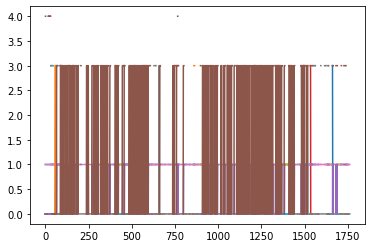

In [279]:
for rr in TcMdCategories:
    plt.plot(new_table_I[rr])
plt.show()

In [207]:
ss_55284_2014 =  table_I_sorted[(table_I_sorted["Explotacion"] == 55284) & (table_I_sorted["Ejercicio"] == 2014)]

Explotacion Ejercicio I_A_10110_TC_MD_TA I_A_10110_TC_MD_IR  \
0       55284      2014                NaN                NaN   
1       55284      2015                NaN                NaN   
2       55290      2014                NaN                NaN   
3       55290      2015                NaN                NaN   
4       55290      2016                NaN                NaN   

  I_A_10110_TC_MD_EN I_A_10110_TC_MD_GM I_OV_10110_TC_MD_V I_CV_10110_TC_MD_V  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

  I_PR_10110_TC_MD_Q I_SA_10110_TC_MD_Q  ... I_A_90300_TC_MD_EN  \
0                NaN                NaN  ...                NaN   
1                NaN                NaN  ...                NaN   
2                NaN                NaN  ...                NaN   
3                NaN                NaN  ...                NaN   
4                NaN                NaN  ...                NaN   

  I_A_90300_TC_MD_GM I_A_90330_TC_MD_TA I_A_90330_TC_MD_IR I_A_90330_TC_MD_EN  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

  I_A_90330_TC_MD_GM I_A_90310_TC_MD_TA I_A_90310_TC_MD_IR I_A_90310_TC_MD_EN  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

  I_A_90310_TC_MD_GM  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  

[5 rows x 1159 columns]

In [280]:
new_table_I.to_csv("table_I.csv", index=False)

Selection of random exploitation/year

In [285]:
rnd_expl = random.sample(list(table_I_sorted.Explotacion), 1)[0]

rnd_year = random.sample(list(table_I_sorted[table_I_sorted["Explotacion"] == rnd_expl].Ejercicio), 1)[0]

print(rnd_expl)
print(rnd_year)

subset = table_I_sorted[(table_I_sorted["Explotacion"] == rnd_expl) & (table_I_sorted["Ejercicio"] == rnd_year)]

row2examine = new_table_I[(new_table_I["Ejercicio"] == rnd_year) & (new_table_I["Explotacion"] == rnd_expl)]
print(subset)

79349
2014
    Ejercicio Explotacion Categoria Tc Md Superf. Tot. Superf. Reg.  \
480      2014       79349     40320  1  0         1400         1400   
481      2014       79349     50900  0  0            2            0   

    Superf. Energ. Superf. Omg. Invent. Inic. Invent. Fin Produc. Cant.  \
480              0            0             0           0           569   
481              0            0             0           0             0   

    Ventas Cant. Ventas Euros Autoconsumo Reempleo  
480          562        18570         257        0  
481            0            0           0        0  


## Checker
The following code will return "ERROR" in case the information contained in the old dataframe for a certain year and exploitaion would not match the corresponding new structure content.

In [286]:
# Year
year = subset.Ejercicio.unique()[0]

# Exploitation
exploitation = subset.Explotacion.unique()[0]

# Getting all crops
crops = sorted(subset.Categoria.unique())

expl_year = {}

# Loop crops
for crop in crops:
    
    # Getting data for the current crop
    row_crop = subset[subset["Categoria"] == crop]
    
    # Loop row_crop columns
    for col in row_crop.columns:
        
        if col == "Tc":
            old_item = row_crop.Tc.item()
            new_col_name = "Tc_" + str(crop)

            new_item = new_table_I[(new_table_I["Explotacion"] == exploitation) & (new_table_I["Ejercicio"] == year)][new_col_name].item()
            
            if new_item != old_item:
                print("ERROR", new_col_name)
                print(old_item, new_item)
                
        elif col == "Md":
            old_item = row_crop.Md.item()
            new_col_name = "Md_" + str(crop)
            new_item = new_table_I[(new_table_I["Explotacion"] == exploitation) & (new_table_I["Ejercicio"] == year)][new_col_name].item()
            
            if new_item != old_item:
                print("ERROR", new_col_name)
                print(old_item, new_item)
        elif not col in ["Ejercicio", "Explotacion", "Categoria", "Tc", "Md"]:
            old_item = row_crop[col].item()

            new_col_name = _newColumnName(col, crop)

            new_item = new_table_I[(new_table_I["Explotacion"] == exploitation) & (new_table_I["Ejercicio"] == year)][new_col_name].item()

            if new_item != old_item:
                print("ERROR", new_col_name)
                print(old_item, new_item)
                
    

For each code (crop) two aditional columns have been generated in order to contain the old columns "Tc" and "Md" parameters for each one.